
     
    
**Название проекта**
        
# Исследование для рекламной кампании интернет-магазина

**Описание исследования.**
        
 Исследование закономерностей, определяющих успешность игр   

**Цель исследования.**
    
Провести анализ данных для выявления потенциально популярных  для планирования стратегии рекламной кампании
_______________________________________________________________________________________________________________
**Задачи исследования.**

Предобработка данных

Исследовательский анализ данных

Статистический анализ


***Часть 1. Изучение общей информации и подготовка данных:***
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.]
* [2. Нахождение и ликвидация пропусков.]
* [3. Подсчет суммарных продаж в отдельный столбец.]
* [4. Поиск и обработка дубликатов.]

***Часть 2. Исследовательский анализ данных:***
* [1. Анализ периодов продаж.]
* [2. Анализ продаж по платформам.]
* [3. Определение актуального периода для исследования.]
* [4. Определение потенциально прибыльных платформ.]
* [5. Глобальные продажи игр в разбивке по платформам.]
* [6. Влияние на продажи отзывов критиков и пользователей.]
* [7. Распределение игр по жанрам.]
        
***Часть 3. Портреты пользователей из каждого региона:***      
* [1. Самые популярные платформы.]
* [2. Самые популярные жанры.]    
* [3. Влияние рейтинга ESRB на продажи в каждом регионе.]
        
        
*** Общий вывод:***          
 </font>
</div>


        
### Часть 1. Изучение общей информации


#### 1.1 Изучение файлов с данными, получение общей информации, загрузка библиотек.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
data = pd.read_csv('/Users/user/Downloads/games.csv') #выгрузим датасет

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info() #посмотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.columns = data.columns.str.lower()


#### 1.2 Нахождение и ликвидация пропусков.

In [6]:
#Найдем пропущенные значения
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

year_of_release     269 - заполним нулями

critic_score       8578 - заменим нулями. Есть предположение, что игры вышли очень рано 80 и ранние 90-е годы, когда система оценок в интернете еще не была актуальна
user_score         6701 - заменим нулями. Есть предположение, что игры вышли очень рано 80 и ранние 90-е годы, когда система оценок в интернете еще не была актуальна
rating             6766 - заменим нулями. Есть предположение, что игры вышли очень рано 80 и ранние 90-е годы, когда система оценок еще не была актуальна




        
Посмотрим уникальные значения для столбцов с пропусками


In [7]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце year_of_release 269 есть пропуски и тип данных float. Тут лучше привести к целочисленному типу данных. И заменить NaN на 0 - чтобы в дальнейшем исследовании увидеть эти пропуски и оценить их влияние.
        
critic_score 8578 - Можно пропуски заменить 0 (заглушка), чтобы прийти к целочисленному типу данных. Предполагаю что так будет проще отследить их влияние (на графиках)
    
user_score 6701 - здесь уже значения с дробными числами, и есть оценки в виде 0. Можно поставить заглушку, например '-10'.
        
rating 6766 - пропуск заменим на 0 (заглушка), чтобы отследить их влияние в дальнейшем.
        
name и genre - 2 пропуска, вероятно ошибка при выгрузке, или не заполнили. можно удалить


In [11]:
#заполним нулями
data['year_of_release'] = data['year_of_release'].fillna('0') 
#приведем в целочисленному типу данных
data['year_of_release'] = data['year_of_release'].astype('int') 
#заполним нулями
data['critic_score'] = data['critic_score'].fillna('0') 
data['critic_score'] = data['critic_score'].astype('int')
#заполним '-10'
data['user_score'] = data['user_score'].fillna('-10') 
#заполним нулями
data['rating'] = data['rating'].fillna('0') 

In [12]:
#посмотрим оценки tbd
data[data['user_score'] == 'tbd'] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0,tbd,E


'tbd' - означает To Be Determined, то есть "Будет определено". То есть информация о рейтинге актуальная на момент еще до  выхода игрывсего Таких строк 2424, что составляет примерно 14,5% от всех данных. Также, возможно эти позиции - дополнение или некое обновление к уже вышедшим играм, или выпуск для другой консоли. 

In [13]:
#заменим tbd на -10

data[data['user_score']=='tbd'] = data[data['user_score']==0]
data['user_score'] = data['user_score'].fillna('-10')
data['user_score'] = data['user_score'].astype('float')
data['user_score'].unique()

array([  8. , -10. ,   8.3,   8.5,   6.6,   8.4,   8.6,   7.7,   6.3,
         7.4,   8.2,   9. ,   7.9,   8.1,   8.7,   7.1,   3.4,   5.3,
         4.8,   3.2,   8.9,   6.4,   7.8,   7.5,   2.6,   7.2,   9.2,
         7. ,   7.3,   4.3,   7.6,   5.7,   5. ,   9.1,   6.5,   8.8,
         6.9,   9.4,   6.8,   6.1,   6.7,   5.4,   4. ,   4.9,   4.5,
         9.3,   6.2,   4.2,   6. ,   3.7,   4.1,   5.8,   5.6,   5.5,
         4.4,   4.6,   5.9,   3.9,   3.1,   2.9,   5.2,   3.3,   4.7,
         5.1,   3.5,   2.5,   1.9,   3. ,   2.7,   2.2,   2. ,   9.5,
         2.1,   3.6,   2.8,   1.8,   3.8,   0. ,   1.6,   9.6,   2.4,
         1.7,   1.1,   0.3,   1.5,   0.7,   1.2,   2.3,   0.5,   1.3,
         0.2,   0.6,   1.4,   0.9,   1. ,   9.7])


        
'critic_score' - заглушка 0
        
'user_score' - заглушка -10
</font>
</div>


        
#### 1.3 Подсчет суммарных продаж в отдельный столбец


In [14]:
#суммарные продажи во всех регионах и запишем их в отдельный столбец
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] +\
data['other_sales']

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,-10.0,0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,-10.0,0,31.38


     
#### 1.5 Поиск и обработка дубликатов


In [15]:
data.duplicated().sum() #проверим наличие явных дубликатов

2423

In [16]:
data['name'].value_counts() #найдем уникальные значения для столбца с названием

Need for Speed: Most Wanted      12
Madden NFL 07                     9
FIFA 14                           9
LEGO Marvel Super Heroes          9
LEGO The Hobbit                   8
                                 ..
Armored Core: Master of Arena     1
Bionicle: Matoran Adventures      1
Puppeteer                         1
Tokyo Jungle                      1
Haitaka no Psychedelica           1
Name: name, Length: 10200, dtype: int64

Посмотрим каждую повторяющуюся позицию детально

Посмотрим эти позиции поименно


In [17]:
data[data['name']=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,0.0,-10.0,0,2.81
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,0.0,-10.0,0,1.01
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,0.0,-10.0,0,0.27
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


Need for Speed: Most Wanted на Х360 и PC выпускалась в 2005 и 2012, оценки одинаковые но продажи разные. Оставляем как есть,
вероятно это перевыпуск или обновленная версия


In [18]:
data[data['name']=='Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,0.0,-10.0,0,4.33
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+,1.03
4127,Sonic the Hedgehog,PS3,0.0,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48


Sonic the Hedgehog на PS3 - 2 позиции с одинаковыеми оценками, 2006г и с пропущенным значением года выпуска. Лучше
оставить, потому что есть продажи в Европе, возможно только на этот рынок перевыпуск был.


In [19]:
data[data['name']=='Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,0.0,7.3,E,0.50
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Здесь дубликат можно удалить, потому что одинаковый год, оценки и почти нет продаж

In [20]:
data[(data['name']=='Madden NFL 13') & (data['platform']=='PS3')].drop_duplicates(subset=['name'], keep='first')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56


Удалим строки с пропусками в name, genre.Их всего два, они неинформативные


In [21]:
data.dropna(subset=['name', 'genre'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,-10.0,0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,-10.0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,-10.0,0,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,-10.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,-10.0,0,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,-10.0,0,0.01


### Часть 2. Исследовательский анализ данных

#### 2.1 Анализ периодов продаж

In [22]:
#Посмотрим сколько игр выпускалось в разные годы

data['year_of_release'].value_counts()


2008.0    1101
2009.0    1021
2007.0    1005
2010.0     924
2011.0     919
2006.0     882
2005.0     818
2003.0     680
2004.0     655
2002.0     637
2012.0     629
2015.0     568
2014.0     560
2013.0     529
2016.0     468
2001.0     400
1998.0     379
1999.0     330
2000.0     307
1997.0     288
1996.0     263
0.0        221
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

 одна игра может выходить на разных платформах. Чтобы посмотреть количество игр, выходивших по годам можно удалить дулбликаты, оставив первый выход 


In [23]:
data_drop_dup = data.drop_duplicates(subset=['name', 'year_of_release'], keep='first')
data_drop_dup['year_of_release'].value_counts()

2008.0    818
2007.0    762
2009.0    734
2006.0    697
2010.0    683
2011.0    655
2005.0    601
2002.0    506
2003.0    500
2004.0    496
2012.0    436
1998.0    364
2001.0    362
2015.0    351
2013.0    333
1999.0    318
2014.0    313
2000.0    289
2016.0    286
1997.0    281
1996.0    258
1995.0    215
0.0       193
1994.0    117
1993.0     60
1981.0     46
1992.0     41
1991.0     40
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     15
1985.0     14
1984.0     14
1980.0      9
Name: year_of_release, dtype: int64

Text(0, 0.5, 'количество игр, шт')

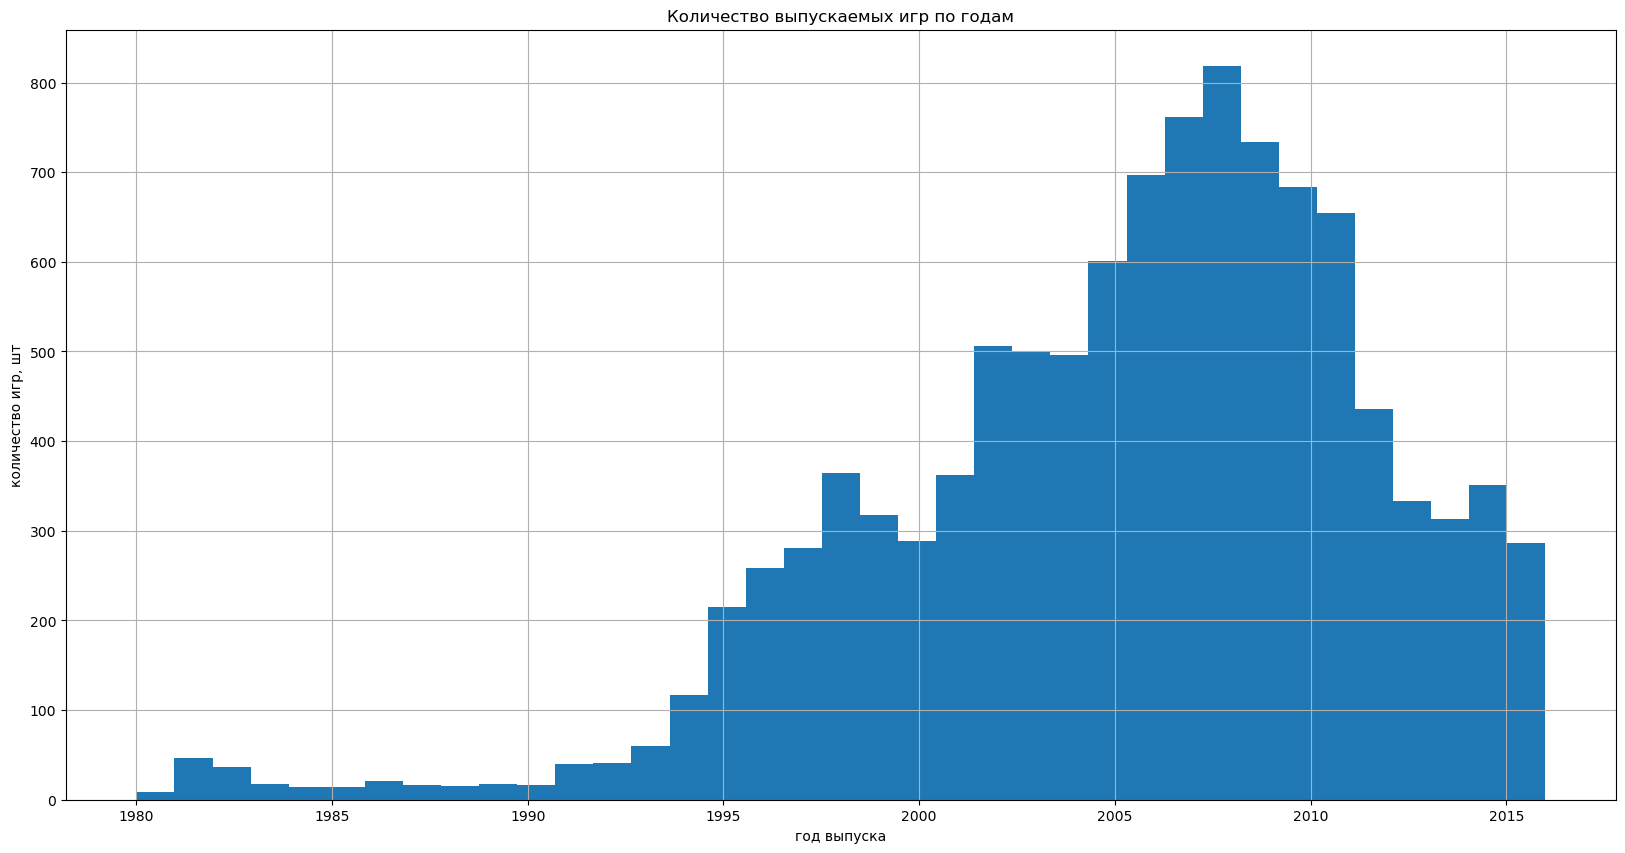

In [24]:

data_drop_dup['year_of_release'].hist(range=(1980, 2016), bins=37, figsize=(20, 10)) 
#построим гистограмму
plt.title("Количество выпускаемых игр по годам")
plt.xlabel("год выпуска")
plt.ylabel("количество игр, шт")

In [25]:
data_drop_dup[data_drop_dup['year_of_release'] == 0] #посмотрим нулевые значения

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
183,Madden NFL 2004,PS2,0.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,0.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,0.0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,1.57,1.02,0.00,0.41,0.0,-10.0,0,3.00
609,Space Invaders,2600,0.0,Shooter,2.36,0.14,0.00,0.03,0.0,-10.0,0,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16329,Brothers in Arms: Furious 4,X360,0.0,Shooter,0.01,0.00,0.00,0.00,0.0,-10.0,M,0.01
16348,Agarest Senki: Re-appearance,PS3,0.0,Role-Playing,0.00,0.00,0.01,0.00,0.0,-10.0,0,0.01
16405,Freaky Flyers,GC,0.0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,0.0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01



Производство игр началось с 1980г и до середины 90-х держалось примерно на одном уровне. Далее с развитием технологий начал развиваться рынок и сфера игровой индустрии. Больше всего игр выпускалось в период с 2003 по 2011, пиковое значение в 2008. Спад после 2008 г вероятно связан с экономическим кризисом, с 2012 рынок относительно держится уровня прозиводства конца 90-х начала 2000-х


#### 2.2 Анализ продаж по платформам


In [26]:
#Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами
#и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые
#платформы?
data['platform'].value_counts().head(10)


PS2     1921
DS      1395
PS3     1244
X360    1178
PS      1152
PSP     1086
PC       925
Wii      880
XB       674
GBA      560
Name: platform, dtype: int64

Построим графики для первых 10 платформ

In [27]:
tmp = data.pivot_table(index='platform', values='sales_total', aggfunc= 'sum').sort_values(
    'sales_total', ascending=False)

top10 = tmp.index[:10].tolist()
print(top10)

['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS', 'PS4', 'PSP', 'GBA', 'PC']


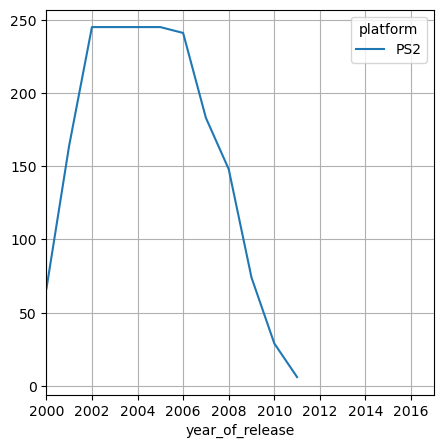

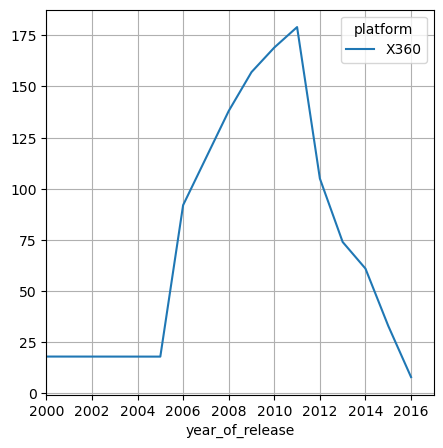

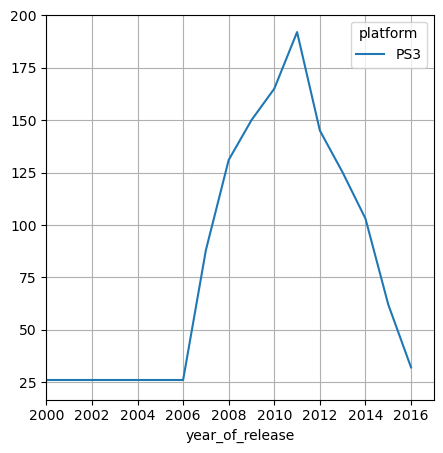

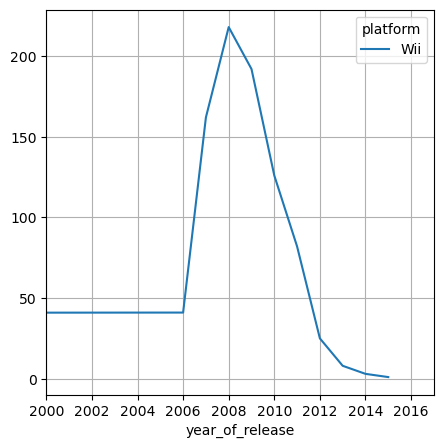

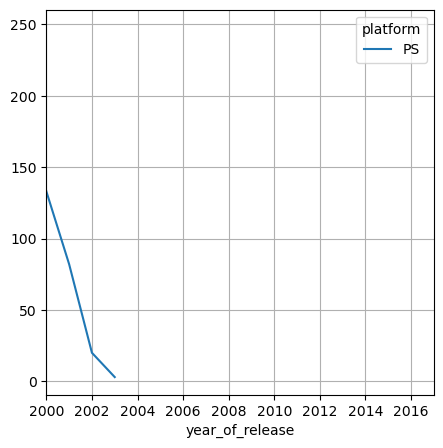

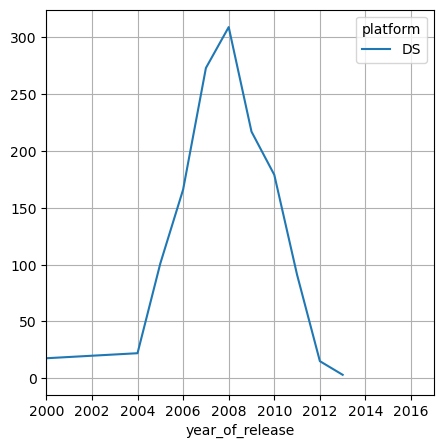

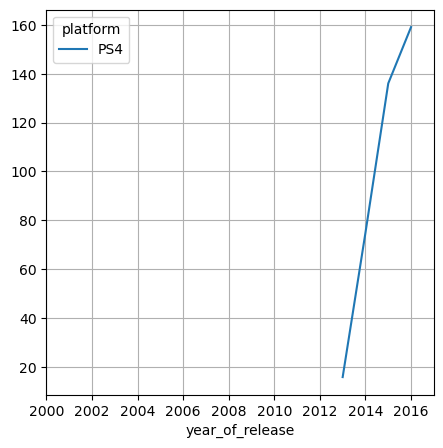

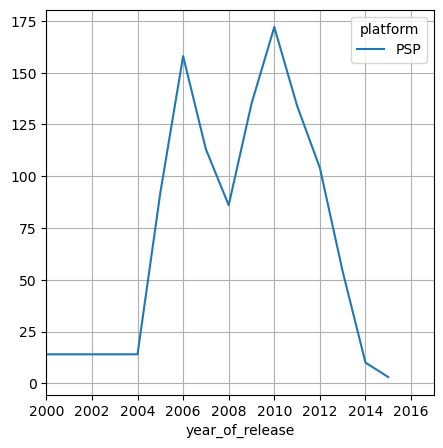

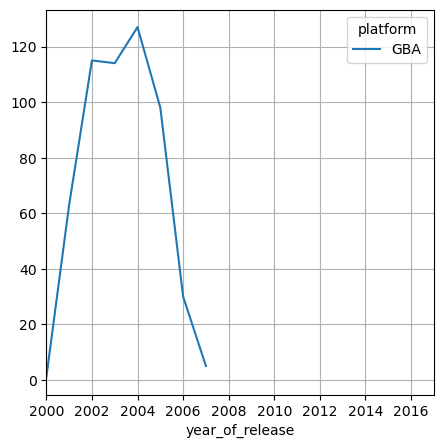

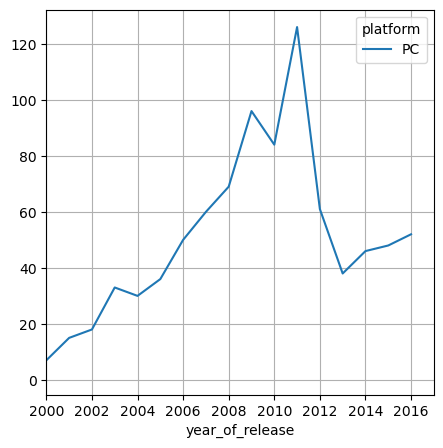

In [28]:
#Реализовала цикл для отображения графиков.
for i in top10:
    data[data['platform']== i].pivot_table(index='year_of_release', values='sales_total', 
                                           columns='platform', \
                                            aggfunc='count').plot(grid=True, style='-', 
                                                                  figsize=(5, 5), \
                                                                  xlim=(2000, 2017))


в среднем платформы актуальны 8-10 лет

#### 2.3 Определение актуального периода для исследования


platform
2600    [1982.0, 1981.0, 1980.0, 0.0, 1983.0, 1987.0, ...
3DO                                      [1995.0, 1994.0]
3DS     [2013.0, 2011.0, 2014.0, 2012.0, 2016.0, 2015....
DC      [1998.0, 2000.0, 1999.0, 2001.0, 2002.0, 2008....
DS      [2006.0, 2005.0, 2010.0, 2009.0, 2004.0, 2007....
GB      [1996.0, 1989.0, 1999.0, 1998.0, 1992.0, 2000....
GBA     [2002.0, 2004.0, 2001.0, 2003.0, 2005.0, 2007....
GC      [2001.0, 2003.0, 2002.0, 2004.0, 2005.0, 2006....
GEN              [1992.0, 1991.0, 1990.0, 1993.0, 1994.0]
GG                                               [1992.0]
N64     [1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001....
NES     [1985.0, 1984.0, 1988.0, 1986.0, 1990.0, 1987....
NG                       [1994.0, 1995.0, 1993.0, 1996.0]
PC      [2009.0, 2004.0, 2012.0, 1996.0, 2010.0, 1995....
PCFX                                             [1996.0]
PS      [1997.0, 1999.0, 1998.0, 1996.0, 2000.0, 1995....
PS2     [2004.0, 2002.0, 2001.0, 2003.0, 2006.0, 0.0, ...
PS3  

Text(0.5, 1.0, 'Продажи игр за все время')

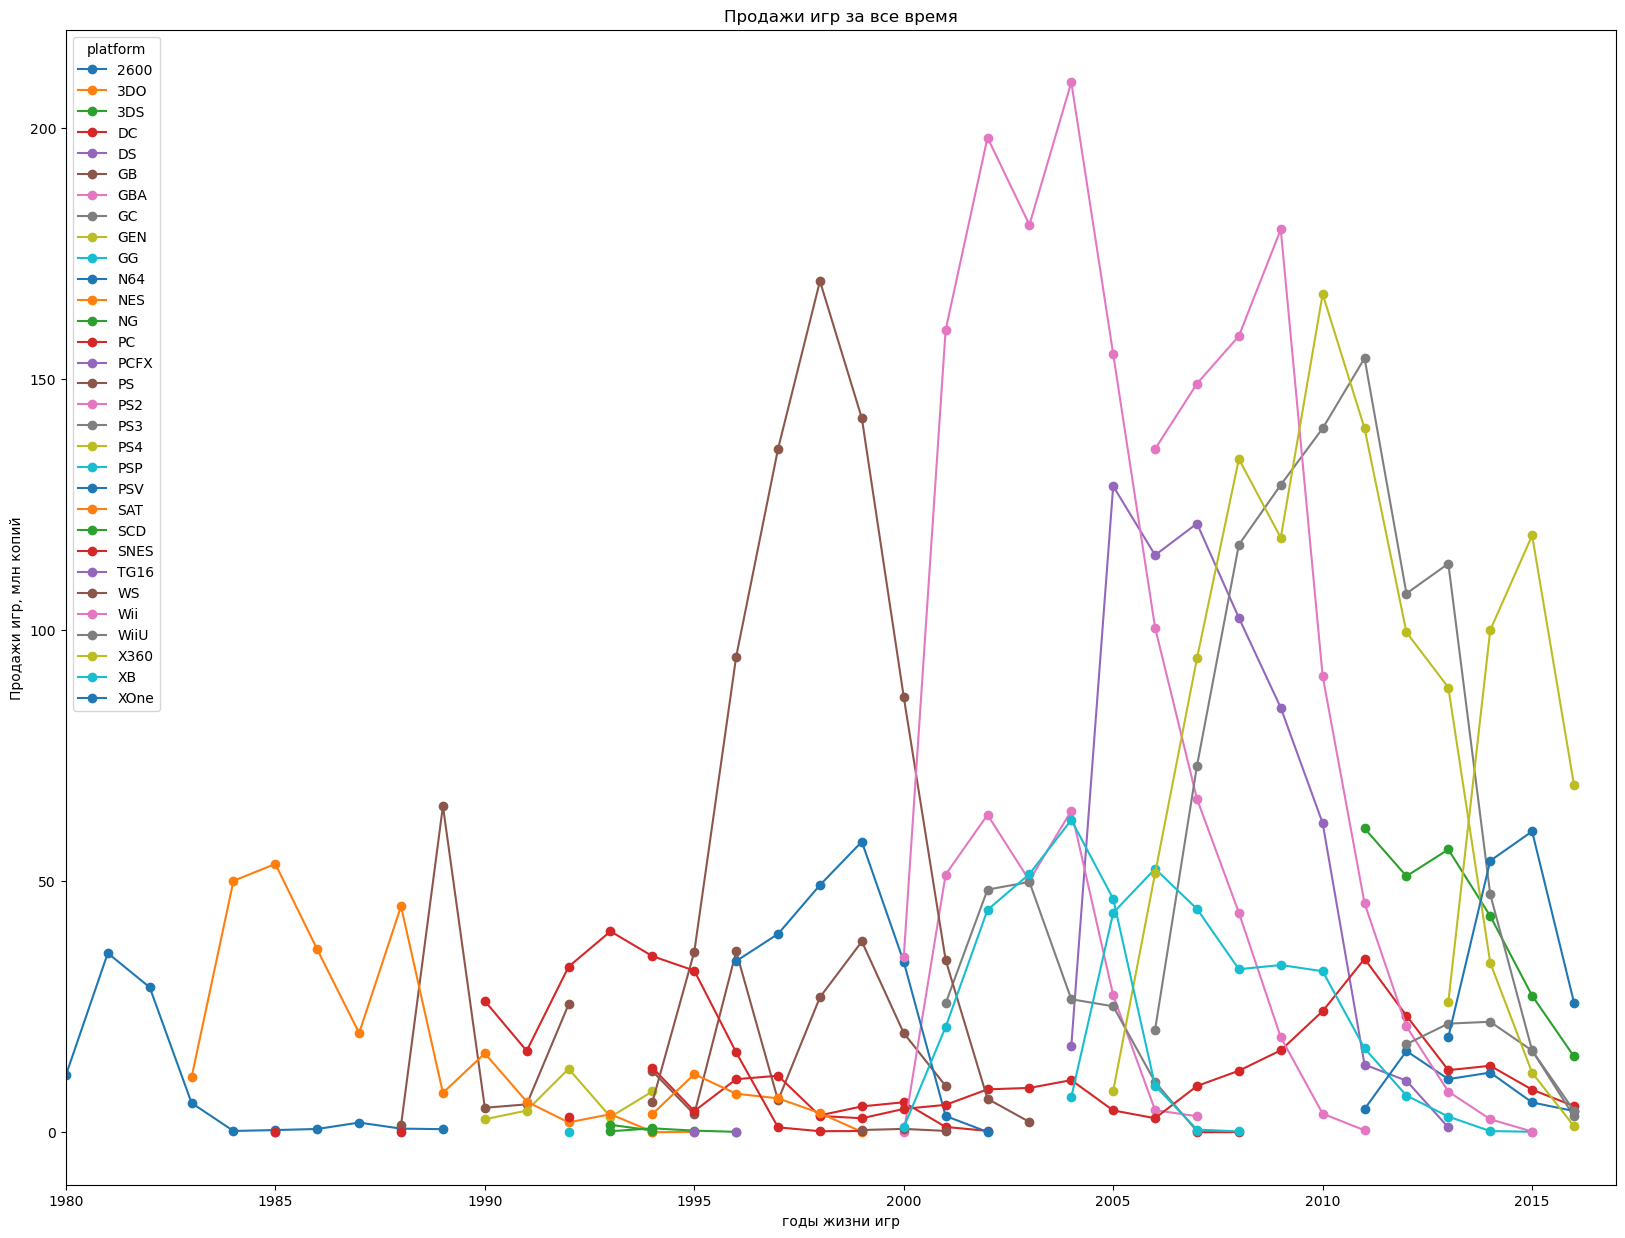

In [29]:
#Возьмем данные за соответствующий актуальный период.  
print(data.groupby('platform')['year_of_release'].unique())

data.pivot_table(index='year_of_release', values='sales_total', \
                 columns='platform', aggfunc='sum')\
.plot.line(style='o-', figsize=(20, 15), xlim=(1980, 2017))
plt.xlabel('годы жизни игр')
plt.ylabel('Продажи игр, млн копий')
plt.title('Продажи игр за все время')


По графику можно сделать вывод что наибольшие продажи с 1995 по 2016 года, предыдущие года учитывать не будем. В приоритете платформы, которые были приносили прибыль последние года. Поэтому первичный актуальный период с 2005 по 2016.

#### 2.4 Определение потенциально прибыльных платформ


In [30]:
print(data.query('year_of_release >= 2014').pivot_table(
    index='year_of_release', values='sales_total', columns='platform', aggfunc='median'))


platform          3DS    PC    PS3   PS4   PSP    PSV   Wii   WiiU  X360  XOne
year_of_release                                                               
2014.0           0.10  0.11  0.180  0.60  0.01  0.065  0.56  0.175  0.23  0.44
2015.0           0.11  0.08  0.070  0.19  0.02  0.030  0.15  0.250  0.23  0.25
2016.0           0.09  0.04  0.065  0.09   NaN  0.030   NaN  0.340  0.12  0.08


Посмотрим какие платформы приносили прибыль последние три года, остальные платформы утратили актуальность и не приносят прибыли
* 3DS - за все время на 12 месте по прибыльности, наибольшую прибыль принесла в первый свой год (2011), в последний год прибыль упала в 2 раза по сравнению с прошлым годом
* PC - на 9 месте по прибыльности за все время, в последние три года стабильный небольшой рост прибыльности
* PS3 - на 3 месте по прибыльности за все время, однако значения за последний год упали в 2 раза по сравнению с прошлым, за последние 3 года прибыль падает
* PS4 - наибольшоее значение за 2016 год, за последние три года прибыль растет. 14 место в списке прибыльности за все время
* PSV - высокое значение за 2016 год, однако на 22% меньше чем за предыдущие два года
* Wii - очень маленькая прибыль, плафторма 6 лет как потеряла актульность
* WiiU - сравнительно небольшая прибыль за этот год, за последние 5 лет своего выхода каждый год прибыль уменьшается
* X360 - сравнительно небольшая прибыль за этот год, значительно снижается прибыль с каждым годом, плафторма 6 лет как теряет актуальность
* XOne - выокое значение за 2016г, удерживает его последние два года. Появилась 4 года назад и растет



In [31]:
data= data[data['year_of_release']>= 2014] 

Актульный период возьмем - последние 3 года, т.к. игровая индустрия стремительно развивается

In [32]:
data.pivot_table(
    index='year_of_release', values='sales_total', columns='platform', aggfunc='median')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,0.10,0.11,0.180,0.60,0.01,0.065,0.56,0.175,0.23,0.44
2015.0,0.11,0.08,0.070,0.19,0.02,0.030,0.15,0.250,0.23,0.25
2016.0,0.09,0.04,0.065,0.09,NaN,0.030,NaN,0.340,0.12,0.08



        
В актуальный период выявили потенциально прибыльные платформы: WiiU, PS3, PS4, XOne, PSV, PC, 3DS,  X360
* Продажи растут и лидируют у WiiU
* Продажи держатся на одном уровне: 3DS (стабильно небольшое падение), PSV (после первого года падение)      
* Продажи падают: PC, PS3, PS4, PSV, X360, XOne


#### 2.5 Глобальные продажи игр в разбивке по платформам


Text(0.5, 1.0, 'Продажи игр по актуальным платформам')

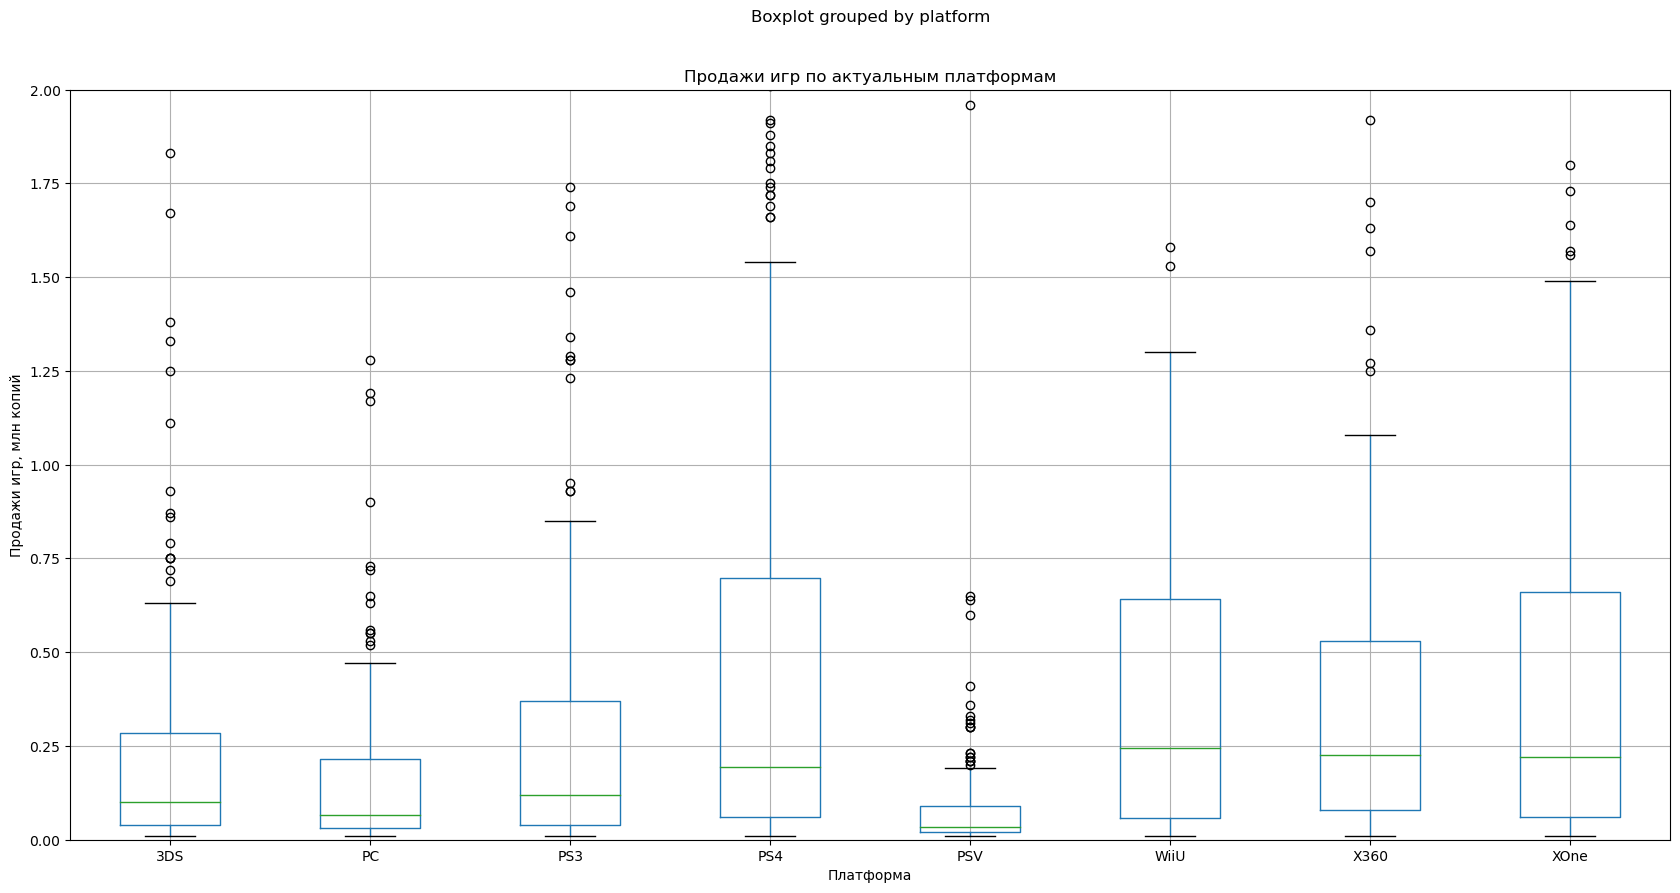

In [33]:
#построим ящик с усами для топ платформ

platform_top = ['WiiU', 'PS4', 'XOne', 'PSV', 'PC', '3DS', 'PS3', 'X360']
data.query('(platform==@platform_top & year_of_release>=2014)')\
.boxplot(column=['sales_total'], by='platform', figsize=(20, 10))
plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Продажи игр, млн копий')
plt.title('Продажи игр по актуальным платформам')
    

Text(0.5, 1.0, 'Продажи игр по актуальным платформам')

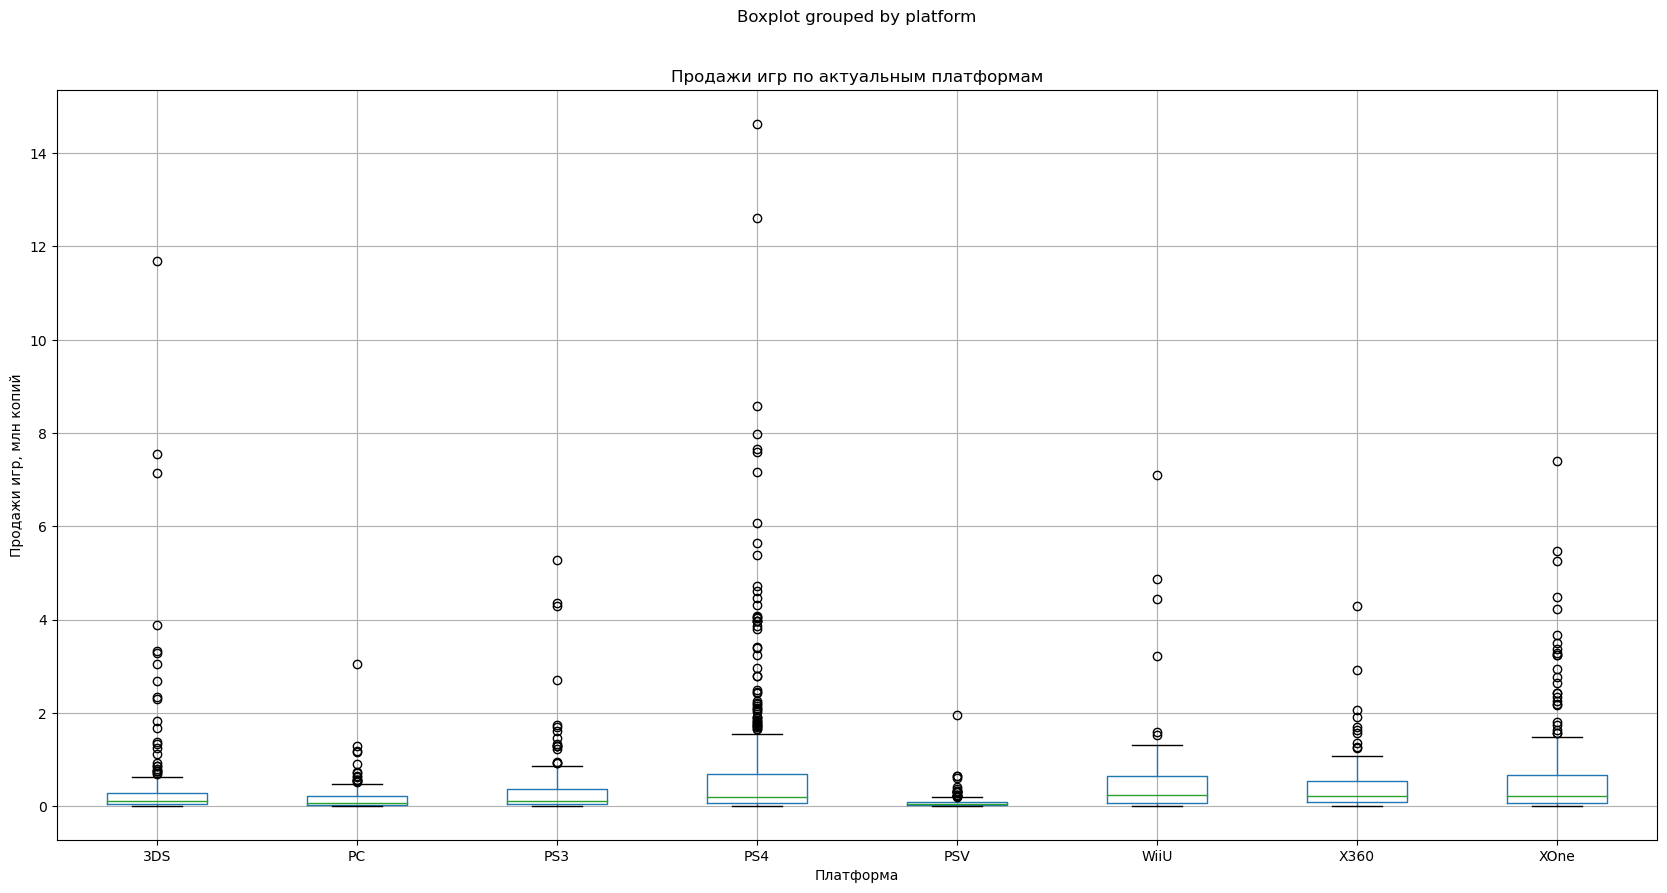

In [34]:

data.query('(platform==@platform_top & year_of_release>=2014)')\
.boxplot(column=['sales_total'], by='platform', figsize=(20, 10))
plt.xlabel('Платформа')
plt.ylabel('Продажи игр, млн копий')
plt.title('Продажи игр по актуальным платформам')


* Наибольшее количество выбросов у PS4 и XOne.
* Наибольшая медиана у  WiiU
        
Характерное примерное значение медианы выделяется в в районе 250 тыс копий для ледующих платформ:
3DS, PS3, PS4, X360, XOne.
При этом межквартильный размах PS4 и XOne наибольший среди платформ из этой выборки.
Большая часть значений лежит в дипазаное до 90 тыс копий для PS4 и XOne.
Предположительно PS4 и XOne - наиболее популярные,  однако медиана говорит о том что на них выпускается наибольшее количество игр, но прибыльность за последние 3 года схожа с 3DS, PS3, Х360.

Для РС и PSV квартильный размах меньше (до 20 тыс копий) чем у другх платформ, медиана также меньше. Эти платформы не так прибыльны.


#### 2.6 Влияние на продажи отзывов критиков и пользователей


для PS4

In [35]:
#Далее будем исследовать данные только за актуальный период, обрежем датафрейм - только последние 3 года
data = data[data['year_of_release'] >= 2014]

In [36]:
#введем переменные, куда положим датафрейм без пропущенных значений и заглушек для 'critic_score'
#и 'user_score' для PS4

data_critic_PS4 = data[(data['critic_score']!=0) & (data['platform']=='PS4')]
data_user_PS4 = data[(data['user_score']!= -10) & (data['platform']=='PS4')]

Text(0.5, 1.0, 'Влияние на продажи отзывов пользователей для PS4')

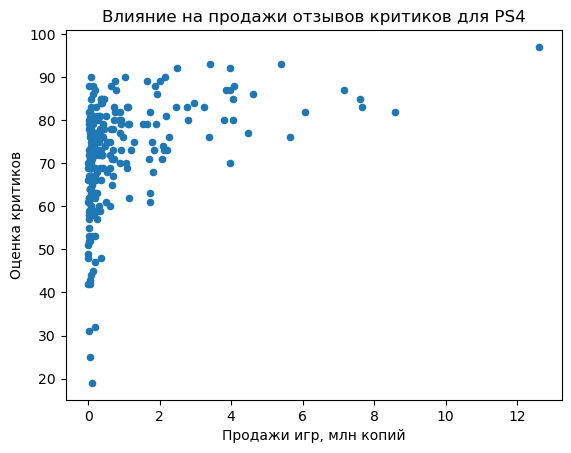

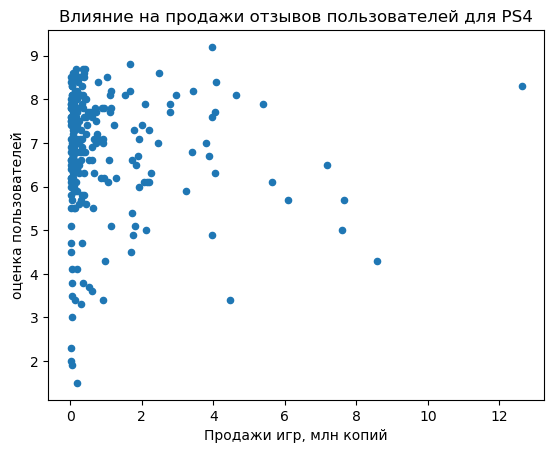

In [37]:
data_critic_PS4.plot(x='sales_total', y='critic_score', kind='scatter')
plt.xlabel('Продажи игр, млн копий')
plt.ylabel('Оценка критиков')
plt.title('Влияние на продажи отзывов критиков для PS4')
data_user_PS4.plot(x='sales_total', y='user_score', kind='scatter')
plt.xlabel('Продажи игр, млн копий')
plt.ylabel('оценка пользователей')
plt.title('Влияние на продажи отзывов пользователей для PS4')

In [38]:
#посчитаем коэф-ты корреляции для этих оценок для PS4

print(data_critic_PS4['critic_score'].corr(data['sales_total']))
print(data_user_PS4['user_score'].corr(data['sales_total']))

0.40249779652369827
-0.040131589472697356



Для PS4:       
Коэффициент для оценки критиков - 0,4 - связь есть но не слишком сильная

Коэффициент для оценки пользователей - -0,04 - линейная связь слабая или отсутствует вовсе


Коэфициенты корреляции ближе к 0, значит связи между этими параметрами скорее всего нет


Посчитаем корреляцию для WiiU


In [39]:
#введем переменные, куда положим датафрейм без пропущенных значений и заглушек для 'critic_score'
#и 'user_score' для WiiU

data_critic_WiiU = data[(data['critic_score']!=0) & (data['platform']=='WiiU')]
data_user_WiiU = data[(data['user_score']!= -10) & (data['platform']=='WiiU')]

Text(0.5, 1.0, 'Влияние на продажи отзывов пользователей для WiiU')

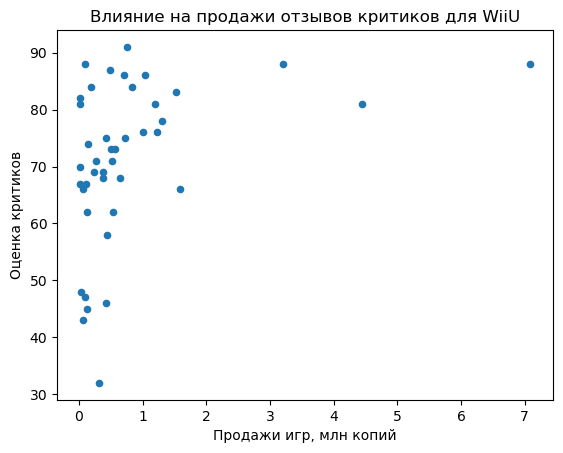

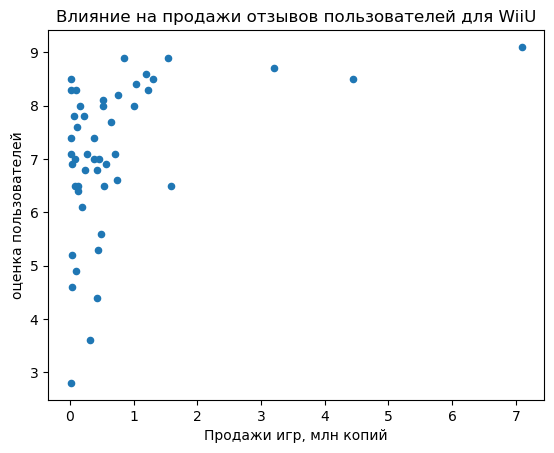

In [40]:
#построим  диаграммы рассеяния для платформы WiiU по оценкам пользователей  и критиков
data_critic_WiiU.plot(x='sales_total', y='critic_score', kind='scatter')
plt.xlabel('Продажи игр, млн копий')
plt.ylabel('Оценка критиков')
plt.title('Влияние на продажи отзывов критиков для WiiU')
data_user_WiiU.plot(x='sales_total', y='user_score', kind='scatter')
plt.xlabel('Продажи игр, млн копий')
plt.ylabel('оценка пользователей')
plt.title('Влияние на продажи отзывов пользователей для WiiU')

In [41]:
#посчитаем коэф-ты корреляции для этих оценок для WiiU

print(data_critic_WiiU['critic_score'].corr(data['sales_total']))

print(data_user_WiiU['user_score'].corr(data['sales_total']))

0.3756402218389979
0.40792645792170773



* Коэффициент для оценки критиков - 0,37 - связь есть но не слишком сильная
        
* Коэффициент для оценки пользователей - 0,4 -связь есть но не слишком сильная



Посчитаем корреляцию для PSV


In [42]:
#введем переменные, куда положим датафрейм без пропущенных значений и заглушек для 'critic_score' 
#и 'user_score' для PSV

data_critic_PSV = data[(data['critic_score']!=0) & (data['platform']=='PC')]
data_user_PSV = data[(data['user_score']!= -10) & (data['platform']=='PC')]

Text(0.5, 1.0, 'Влияние на продажи отзывов пользователей для PSV')

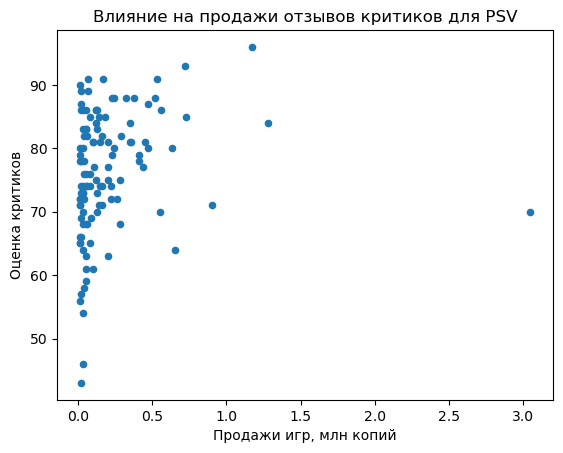

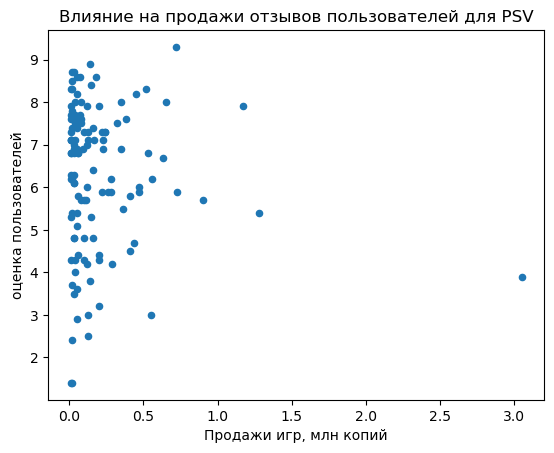

In [43]:
#построим  диаграммы рассеяния для платформы PSV по оценкам пользователей  и критиков
data_critic_PSV.plot(x='sales_total', y='critic_score', kind='scatter')
plt.xlabel('Продажи игр, млн копий')
plt.ylabel('Оценка критиков')
plt.title('Влияние на продажи отзывов критиков для PSV')
data_user_PSV.plot(x='sales_total', y='user_score', kind='scatter')
plt.xlabel('Продажи игр, млн копий')
plt.ylabel('оценка пользователей')
plt.title('Влияние на продажи отзывов пользователей для PSV')

In [44]:
#посчитаем коэф-ты корреляции для этих оценок для _PSV

print(data_critic_PSV['critic_score'].corr(data['sales_total']))
print(data_user_PSV['user_score'].corr(data['sales_total']))

0.17463413769350036
-0.07159665703472451



* Коэффициент для оценки критиков - 0,17 - линейная связь слабая или отсутствует вовсе

* Коэффициент для оценки пользователей - 0,07 - линейная связь слабая или отсутствует вовсе



Сравнив 3 платформы, можно сказать что для каждой платформы свои значения корреляции. Обобщим итоги этого ислледования - Оценки пользователей не влияют значимо на продажи, связь между оценками критиков и продажами есть, но не сильная


Сравнив полученные результаты из построения ящиков с усами для платформ, диаграмм рассеяния и цифр по общим продажам - можно сделать вывод что самые перспективные платформы - PS4, PC, XOne, 3DS

#### 2.7 Распределение игр по жанрам


Text(0, 0.5, 'количество игр, шт')

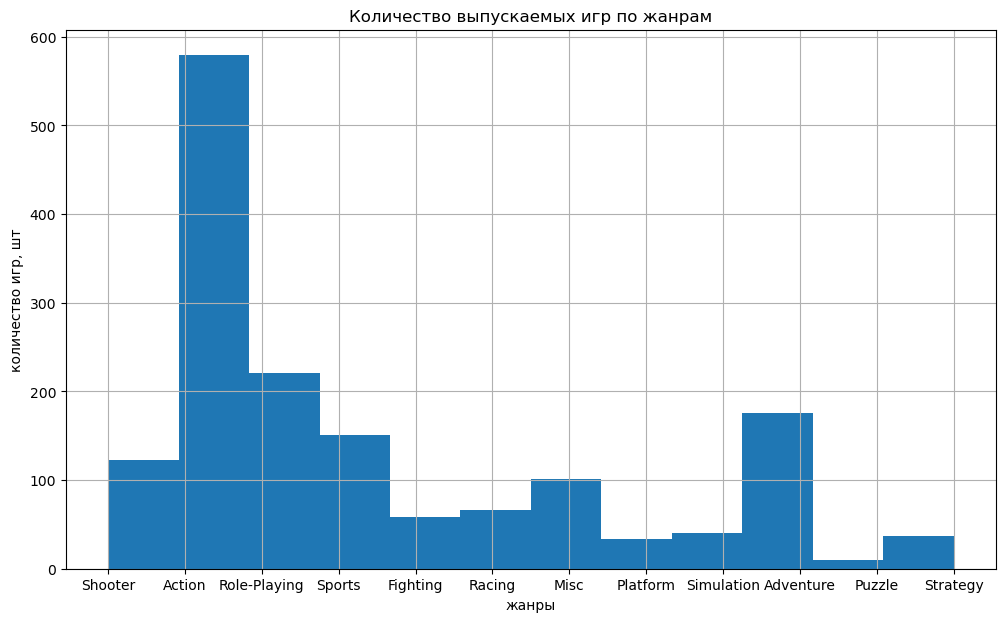

In [45]:
#Посмотрм общее распределение игр по жанрам
data['genre'].hist(figsize=(12, 7), bins=12)
data.pivot_table(index='genre', values='sales_total', aggfunc='median').\
sort_values(by='sales_total', ascending=False)
plt.title("Количество выпускаемых игр по жанрам")
plt.xlabel("жанры")
plt.ylabel("количество игр, шт")


на первом месте по продажам шутеры.
Гистограмма показывает что в жанре Экшн выпускается самое большое количество игр, а в таблице по продажам на 5 месте лишь. Это значит в жанре Экшн присутствует большое количество непопулярных игр с низкими продажами.
Самые прибыльные игры в жанре Shooter, Sports, Misc, Role_playing, Action.
У Adventure, Strategy, Racing и Puzzle - меньше всего продаж.


        
### Часть 3. Портреты пользователей из каждого региона


#### 3.1 Самые популярные платформы


In [46]:
#Определим для пользователя каждого региона (NA, EU, JP):
#Самые популярные платформы (топ-5)
print(data.pivot_table(index='platform', values='na_sales', aggfunc='median').\
      sort_values(by='na_sales', ascending=False)\
      .head())
print(data.pivot_table(index='platform', values='eu_sales', aggfunc='median').\
      sort_values(by='eu_sales', ascending=False)\
      .head())
print(data.pivot_table(index='platform', values='jp_sales', aggfunc='median').\
      sort_values(by='jp_sales', ascending=False)\
      .head())

          na_sales
platform          
X360         0.135
WiiU         0.120
XOne         0.120
Wii          0.085
PS4          0.050
          eu_sales
platform          
Wii          0.245
WiiU         0.080
PS4          0.075
XOne         0.070
X360         0.060
          jp_sales
platform          
3DS           0.06
PSV           0.03
PS3           0.02
PS4           0.02
PSP           0.02


Text(0.5, 1.0, 'Продажи по плафтормам в Северной Америке')

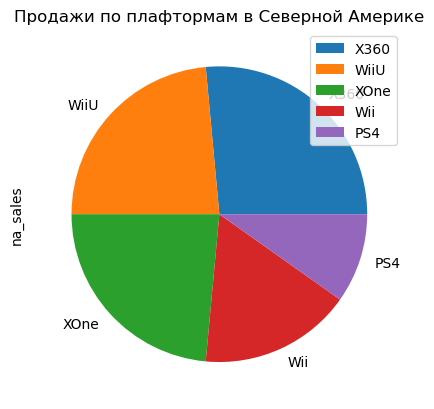

In [47]:
data.pivot_table(index='platform', values='na_sales', aggfunc='median').\
sort_values(by='na_sales', ascending=False).head()\
.plot(y='na_sales', kind='pie')
plt.title("Продажи по плафтормам в Северной Америке")


Text(0.5, 1.0, 'Продажи по плафтормам в Европе')

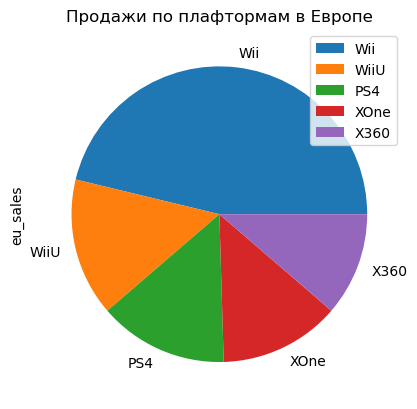

In [48]:
data.pivot_table(index='platform', values='eu_sales', aggfunc='median').\
sort_values(by='eu_sales', ascending=False).head()\
.plot(y='eu_sales', kind='pie')
plt.title("Продажи по плафтормам в Европе")

Text(0.5, 1.0, 'Продажи по плафтормам в Японии')

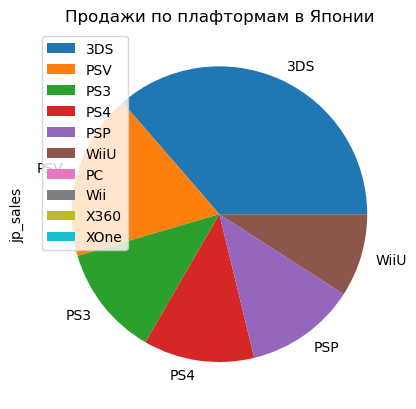

In [49]:
data.pivot_table(index='platform', values='jp_sales', aggfunc='median').\
sort_values(by='jp_sales', ascending=False)\
.plot(y='jp_sales', kind='pie')
plt.title("Продажи по плафтормам в Японии")

Различие в долях продаж можно описать масштабом рынков этих регионов

* В СА лидируют по продажам X360. Также в топе чуть меньше продаж у WiiU, XOne  Остальные платформы в сравнении с лидером показывают себя  слабее- WiiU, PS4  .
        
* В Европе - лидируют по продажам Wii, затем в 2-3 раза меньше продаж у WiiU, PS4,  XOne, Х360  
    
* В Японии - отсутствуют продажи X360, XOne. Самая поплуярная платформа - 3DS, затем идет PSV в2 раза меньше продаж.
   PS3, PS4, PSP - в 3 раза менее прибыльные чем 3DS


#### 3.2 Самые популярные жанры


In [50]:
#Самые популярные жанры (топ-5). Поясните разницу.
print(data.pivot_table(index='genre', values='na_sales', aggfunc='median').\
      sort_values(by='na_sales', ascending=False).head())
print(data.pivot_table(index='genre', values='eu_sales', aggfunc='median').\
      sort_values(by='eu_sales', ascending=False).head())
print(data.pivot_table(index='genre', values='jp_sales', aggfunc='median').\
      sort_values(by='jp_sales', ascending=False).head())

          na_sales
genre             
Shooter      0.240
Sports       0.090
Platform     0.080
Fighting     0.045
Racing       0.030
            eu_sales
genre               
Shooter        0.230
Sports         0.060
Platform       0.055
Racing         0.050
Simulation     0.035
              jp_sales
genre                 
Puzzle           0.055
Role-Playing     0.050
Fighting         0.035
Misc             0.020
Action           0.010


Text(0.5, 1.0, 'Продажи по жанрам в Северной Америке')

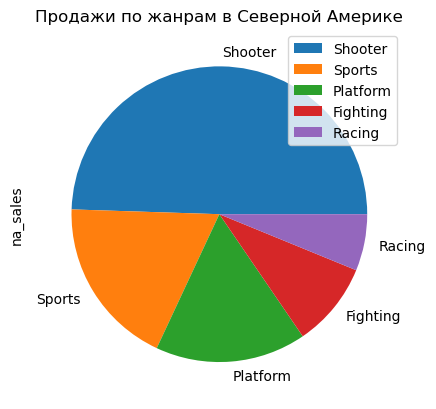

In [51]:
data.pivot_table(index='genre', values='na_sales', aggfunc='median').\
sort_values(by='na_sales', ascending=False).head().\
plot(y='na_sales', kind='pie')
plt.title("Продажи по жанрам в Северной Америке")

Text(0.5, 1.0, 'Продажи по жанрам в Европе')

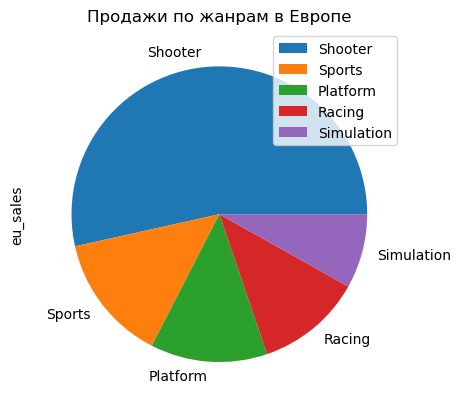

In [52]:
data.pivot_table(index='genre', values='eu_sales', aggfunc='median').\
sort_values(by='eu_sales', ascending=False).head()\
.plot(y='eu_sales', kind='pie')
plt.title("Продажи по жанрам в Европе")

Text(0.5, 1.0, 'Продажи по жанрам в Японии')

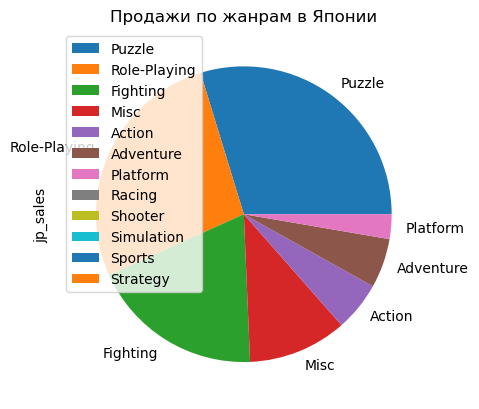

In [53]:
data.pivot_table(index='genre', values='jp_sales', aggfunc='median').\
sort_values(by='jp_sales', ascending=False)\
.plot(y='jp_sales', kind='pie')
plt.title("Продажи по жанрам в Японии")

* В СА предпочитают Shooter, на 2 месте - Sports, на 3- MISc - также довольно неплохие показатели прибыльности. В топ-5 жанров также вошел Platform и Action - в 3 раза меньше цифры чем у Shooter
        
* В Евпропе - наиболее популярен Shooter. Sports, Simulation, Misc, Action - популярность меньше более чем в 2 раза. 
        
* В Японии на первом месте -Fighting , затем Puzzle и Role-Playing. 
        


#### 3.3 Влияние рейтинга ESRB на продажи в отдельном регионе


In [54]:
print(data.pivot_table(index='rating', values='na_sales', aggfunc='median').\
      sort_values(by='na_sales', ascending=False))
print(data.pivot_table(index='rating', values='eu_sales', aggfunc='median').\
      sort_values(by='eu_sales', ascending=False))
print(data.pivot_table(index='rating', values='jp_sales', aggfunc='median').\
      sort_values(by='jp_sales', ascending=False))

        na_sales
rating          
E10+        0.13
M           0.12
E           0.06
T           0.03
0           0.00
        eu_sales
rating          
M           0.12
E10+        0.10
E           0.06
T           0.04
0           0.00
        jp_sales
rating          
0           0.02
T           0.01
E           0.00
E10+        0.00
M           0.00


Text(0.5, 1.0, 'Продажи по рейтингам в Северной Америке')

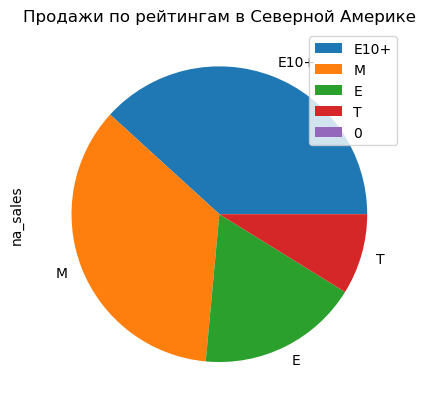

In [55]:
data.pivot_table(index='rating', values='na_sales', aggfunc='median').\
sort_values(by='na_sales', ascending=False)\
.plot(y='na_sales', kind='pie')
plt.title("Продажи по рейтингам в Северной Америке")

Text(0.5, 1.0, 'Продажи по рейтингам в Европе')

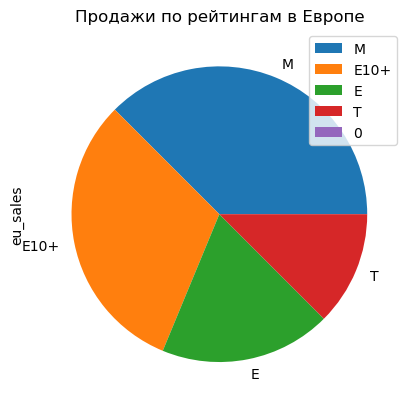

In [56]:
data.pivot_table(index='rating', values='eu_sales', aggfunc='median').\
sort_values(by='eu_sales', ascending=False)\
.plot(y='eu_sales', kind='pie')
plt.title("Продажи по рейтингам в Европе")

Text(0.5, 1.0, 'Продажи по рейтингам в Японии')

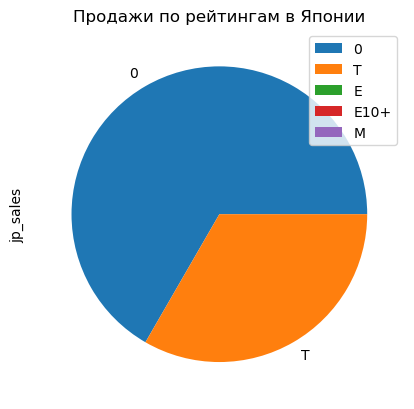

In [57]:
data.pivot_table(index='rating', values='jp_sales', aggfunc='median').\
sort_values(by='jp_sales', ascending=False)\
.plot(y='jp_sales', kind='pie')
plt.title("Продажи по рейтингам в Японии")



* В СА и Европе лидируют игры с рейтингом E10 и М, затем идут Е и Т
        
* В Японии лидер продаж - без этой оценки. Можно предположить, что у них есть свой рейтинг для игр или развито производство игр только для внутреннего рынка



### Общий вывод



По результатам предобработки данных были выявлены пропуски в следующих значениях:
* year_of_release 269 - Пропусков немного -  заполнили нулями для удобства в дальнейшей работе с данными.
       

* critic_score 8578 - Заменили пропуски на заглушку (0), чтобы в исследованиях и графиках мы смогли отследить эти пропуски и их влияние. Более 51% данных без данной оценки. Это много, нужно учесть это при проверке гипотез о влиянии.

* user_score 6701 - Заменили пропуски на заглушку (-10), чтобы в исследованиях и графиках мы смогли отследить эти пропуски и их влияние. 40% данных - без оценки пользователей. Здесь также есть оценка, обозначенная 'tbd' - что значит to be determined. Предположительно это могут быть дополнения или некие обновления к уже вышедшим играм, выпуски для других платформ. Сделали на нее такую же заглушку -10.

* rating 6766 - Заменили пропуски на заглушку (0), чтобы отследить их влияние в дальнейшем. 40% данных - без оценки ESRB. Можно предположить что т.к. это Американское рейтинговое агентство выдает данный рейтинг, то есть н-р игры производства Японии, у которых есть свой подобный рейтинг
       
Был проведен исслеодовательский анализ данных.        

Построив гистограммы проанализировали периоды продаж.
Производство игр началось с 1980г и до середины 90-х держалось примерно на одном уровне. Далее с развитием технологий начал и развивать рынок и сфера игровой индустрии. Пик продаж был в 2008, а после него Спад, вероятно связан с экономическим кризисом этого года. с 2012 рынок относительно держится уровня прозиводства конца 90-х начала 2000-х.
Далее мы проанализировали продажи по платформам, и выяснили что примерный срок жизни платформы - 10 лет. 
Актуальный период был выбран - 3 года, поскольку это очень динамично развивающийся рынок. Основываясь на данных 2014-2016г мы и делали исследование.
В актуальный период выявили потенциально прибыльные платформы: WiiU, PS3, PS4, XOne, PSV, PC, 3DS, X360

Продажи растут и лидируют у WiiU
Продажи держатся на одном уровне: 3DS (стабильно небольшое падение), PSV (после первого года падение)
Продажи падают: PC, PS3, PS4, PSV, X360, XOne

Сама перспективная платформа WiiU (наибольшее средней значение продаж среди всех платформ).
у XOne, PS4 - множество выпусков. у X360, XOne, PS4 - высокие средние значения продаж, но меньше чем у WiiU и продажи падают. PSV  - продажи держатся одного уровня последние два года, но среднее значение продаж значительно меньше из этой выборки.
Далее мы рассматривали влияние на продажи отзывов критиков и пользователей, рассмтрели на примерех 3 платформ - PS4, WiiU и PSV
Посчитали корреляцию оценок для этих платформ. Сравнив 3 платформы, можно сказать что для каждой платформы свои значения корреляции. Обобщив итоги этого ислледования - Оценки пользователей не влияют значимо на продажи, связь между оценками критиков и продажами есть, но не сильная.

Рассмотрели распределение игр по жанрам - лидирует жанр Shooter, в топ3 попали также Sports, Platform.

Рассмотрели как в каждом регионе распределятся:
Самые популярные платформы
* В СА лидируют по продажам X360. Также в топе чуть меньше продаж у WiiU, XOne  Остальные платформы в сравнении с лидером показывают себя  слабее- WiiU, PS4  .
        
* В Европе - лидируют по продажам Wii, затем в 2-3 раза меньше продаж у WiiU, PS4,  XOne, Х360  
    
* В Японии - отсутствуют продажи X360, XOne. Самая поплуярная платформа - 3DS, затем идет PSV в2 раза меньше продаж.
   PS3, PS4, PSP - в 3 раза менее прибыльные чем 3DS

Самые популярные жанры
* В СА предпочитают Shooter, на 2 месте - Sports, на 3- MISc - также довольно неплохие показатели прибыльности. В топ-5 жанров также вошел Platform и Action - в 3 раза меньше цифры чем у Shooter
        
* В Евпропе - наиболее популярен Shooter. Sports, Simulation, Misc, Action - популярность еньше более ем в 2 раза. 
        
* В Японии на первом месте -Fighting , затем Puzzle и Role-Playing. 
        

Посмотрели влияет ли рейтинг ESRB на продажи. 

* В СА и Европе лидируют игры с рейтингом E10 и М, затем идут Е и Т
        
* В Японии лидер продаж - без этой оценки. наличие этой оценки не влияет на продажи. Вероятно у них есть свой рейтинг.


